In [3]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 653.6 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 544.7 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 654.9 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/235.6 kB 762.6 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/

In [1]:
import pandas as pd
import numpy as np
# import xgboost
# from xgboost import XGBRegressor
# from xgboost import plot_tree #requieres graphviz https://www.graphviz.org/
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
pd.set_option('display.max_columns',None)

from imblearn.under_sampling import NearMiss
import imblearn

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
df_clean = pd.read_excel("C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/clean_5.xlsx")

# df_clean.rename(columns={
#     'CURRENT_A_CALC':,
#  'CURRENT_B_CALC':,
#  'CURRENT_C_CALC':,
#  'CURRENT_D_CALC':,
#  'POWER_A':,
#  'POWER_B':,
#  'POWER_C':,
#  'POWER_D':,
#  'TEMPERATURE_A':,
#  'TEMPERATURE_B':,
#  'TEMPERATURE_C':,
#  'TEMPERATURE_D':,
#  'VOLTAGE_A':,
#  'VOLTAGE_B':,
#  'VOLTAGE_C':,
#  'VOLTAGE_D':,
# },inplace=True)
# df_clean['ciclo'] = df_clean.groupby(['bateria','fecha_exp'])['fecha_exp'].cumcount()+1
##df_clean.groupby('bateria')['ciclo'].describe()

def contar(data):
    cuenta = 1
    cuentas = []
    for i in range(0,(len(data))):
        if i>0:
            if data['bateria'][i]!=data['bateria'][i-1]:
                cuenta = 1
            elif data['fecha_exp'][i]!=data['fecha_exp'][i-1]:
                cuenta = cuenta + 1
        cuentas.append(cuenta)
    return cuentas
df_clean['ciclo'] = contar(df_clean)

lista_metroplus = df_clean[df_clean['lugar']=='metroplus']['fecha_exp'].unique()

df_clean_6 = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)]

#imputar velocidad prom y distancia

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
imputar_1 = df_clean_6[df_clean_6['bateria']==1].groupby('fecha_exp')[['distancia','duracion_minutos','vel_prom','vel_max','new_time','ciclo']].last().reset_index().replace(0,np.nan)
imputar_1.iloc[:,1:] = pd.DataFrame(knn_imputer.fit_transform(imputar_1.iloc[:,1:]), columns=imputar_1.iloc[:,1:].columns)

imputar_2 = df_clean_6[df_clean_6['bateria']==2].groupby('fecha_exp')[['distancia','duracion_minutos','vel_prom','vel_max','new_time','ciclo']].last().reset_index().replace(0,np.nan)
imputar_2.iloc[:,1:] = pd.DataFrame(knn_imputer.fit_transform(imputar_2.iloc[:,1:]), columns=imputar_2.iloc[:,1:].columns)

imputar_final = pd.concat([imputar_1,imputar_2],axis=0)

df_clean_6 = df_clean_6.merge(imputar_final, on='fecha_exp', suffixes=('_ELIMINAR', ''))
suffix_to_drop = '_ELIMINAR'
columns_to_drop = df_clean_6.filter(like=suffix_to_drop, axis=1).columns
df_clean_6 = df_clean_6.drop(columns=columns_to_drop)



In [84]:
# df_clean_6.to_excel("C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/clean_6.xlsx",index=False)

In [4]:
df_clean_6 = pd.read_excel("C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/clean_6.xlsx")

In [5]:
# variables_ciclo_inicial = [
#     'distancia', 'vel_max', 'vel_prom',
#     'ACCELERATION_X', 'ACCELERATION_Y', 'ACCELERATION_Z', 'CURRENT_A_CALC',
#     'CURRENT_B_CALC', 'CURRENT_C_CALC', 'CURRENT_D_CALC', 'POWER_A',
#     'POWER_B', 'POWER_C', 'POWER_D', 'TEMPERATURE_A', 'TEMPERATURE_B',
#     'TEMPERATURE_C', 'TEMPERATURE_D', 'VOLTAGE_A', 'VOLTAGE_B', 'VOLTAGE_C',
#     'VOLTAGE_D', 'ENV_HUMIDITY', 'ENV_TEMPERATURE','ciclo','bateria'
#     ]
# variables_ciclo = [x for x in variables_ciclo_inicial if x != 'bateria']

# variables_sin_ciclo_inicial = [
#     'distancia', 'vel_max', 'vel_prom',
#     'ACCELERATION_X', 'ACCELERATION_Y', 'ACCELERATION_Z', 'CURRENT_A_CALC',
#     'CURRENT_B_CALC', 'CURRENT_C_CALC', 'CURRENT_D_CALC', 'POWER_A',
#     'POWER_B', 'POWER_C', 'POWER_D', 'TEMPERATURE_A', 'TEMPERATURE_B',
#     'TEMPERATURE_C', 'TEMPERATURE_D', 'VOLTAGE_A', 'VOLTAGE_B', 'VOLTAGE_C',
#     'VOLTAGE_D', 'ENV_HUMIDITY', 'ENV_TEMPERATURE','bateria'
#     ]
# variables_sin_ciclo = [x for x in variables_sin_ciclo_inicial if x != 'bateria']

In [5]:
variables_ciclo_inicial = [
    'distancia', 'vel_max', 'vel_prom',
    'ACCELERATION_X', 'ACCELERATION_Y', 'ACCELERATION_Z', 'CURRENT_A_CALC',
    'CURRENT_B_CALC', 'CURRENT_C_CALC', 'CURRENT_D_CALC', 'POWER_A',
    'POWER_B', 'POWER_C', 'POWER_D', 'TEMPERATURE_A', 'TEMPERATURE_B',
    'TEMPERATURE_C', 'TEMPERATURE_D', 'VOLTAGE_A', 'VOLTAGE_B', 'VOLTAGE_C',
    'VOLTAGE_D', 'ENV_HUMIDITY', 'ENV_TEMPERATURE','ciclo','bateria'
    ]
variables_ciclo = [x for x in variables_ciclo_inicial if x != 'bateria']

variables_sin_ciclo_inicial = [
    'VOLTAGE_B', 'VOLTAGE_A', 'TEMPERATURE_A', 'TEMPERATURE_B', 'TEMPERATURE_C',
    'distancia', 'vel_prom', 'POWER_B', 'CURRENT_B_CALC', 'ENV_HUMIDITY',
    'ENV_TEMPERATURE', 'CURRENT_A_CALC', 'POWER_A'
    ,'bateria'
    ]

variables_sin_ciclo = [x for x in variables_sin_ciclo_inicial if x != 'bateria']

In [27]:
y_train.shape

(29854,)

In [28]:
y_test.shape

(12796,)

In [29]:
X_test.shape

(12796, 15)

In [25]:
X_train

,VOLTAGE_B,VOLTAGE_A,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,distancia,vel_prom,POWER_B,CURRENT_B_CALC,ENV_HUMIDITY,ENV_TEMPERATURE,CURRENT_A_CALC,POWER_A,bateria,RUL_registro
36149,14.79,30.22,84.008857,86.180000,85.636667,16.54,16.9,0.21,4.11,57.130000,23.730000,0.28,0.01,1,76
10609,18.52,37.95,60.770000,61.461667,60.539677,16.88,17.4,0.00,0.07,71.090000,21.943077,0.16,0.00,1,1067
26589,16.99,34.76,49.935294,50.633636,49.902000,0.00,0.0,0.69,13.39,68.440000,22.460000,3.52,0.10,1,1054
58657,18.46,37.87,27.410000,27.410000,27.410000,15.46,18.7,0.31,5.93,67.490000,22.926757,1.06,0.03,2,1264
68776,16.49,33.54,36.761081,36.426923,36.420000,15.18,17.8,0.80,15.53,61.680000,23.700000,3.45,0.10,2,694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41390,20.35,41.71,22.270000,22.670000,22.990000,13.65,15.0,0.00,0.06,62.870000,24.590000,0.09,0.00,1,1642
42487,17.60,36.07,61.525238,62.290000,63.014000,13.65,15.0,0.00,0.05,48.620000,27.670000,0.14,0.00,1,545
10489,16.61,34.08,54.772000,53.548000,54.456667,16.88,17.4,0.67,12.84,71.126667,22.338750,3.01,0.09,1,1187
68359,18.25,37.53,26.538000,26.098000,26.720000,15.18,17.8,0.45,8.64,61.750000,23.760000,1.34,0.04,2,1111


In [6]:
# X_bat = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)][variables_sin_ciclo_inicial+['RUL_registro']]#[['CURRENT_A_CALC','POWER_A','TEMPERATURE_A','VOLTAGE_A']]
# y_bat = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)]['bateria']
X_bat = df_clean_6[variables_sin_ciclo_inicial+['RUL_registro']]
y_bat = df_clean_6['bateria']

random_seed = 42
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=random_seed)
X_balanced, y_balanced = undersample.fit_resample(X_bat, y_bat)

y_balanced = X_balanced['RUL_registro'].values
# X_balanced = X_balanced[variables_sin_ciclo]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X_balanced,#X_Min_Max,
                                        y_balanced,#values.reshape(-1),
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True,
                                        stratify = X_balanced['bateria']
                                    )

X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(
                                        X_test,#X_Min_Max,
                                        y_test,#values.reshape(-1),
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True,
                                        stratify = X_test['bateria']
                                    )

X_train.drop(['bateria','RUL_registro'],axis=1,inplace=True)
X_test.drop(['bateria','RUL_registro'],axis=1,inplace=True)
X_test_1.drop(['bateria','RUL_registro'],axis=1,inplace=True)
X_test_2.drop(['bateria','RUL_registro'],axis=1,inplace=True)



In [97]:
X_train.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/X_train.xlsx',index=False)
pd.DataFrame(y_train).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/y_train.xlsx',index=False)
X_test.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/X_test.xlsx',index=False)
pd.DataFrame(y_test).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/y_test.xlsx',index=False)
X_test_1.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/X_test_1.xlsx',index=False)
pd.DataFrame(y_test_1).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/y_test_1.xlsx',index=False)
X_test_2.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/X_test_2.xlsx',index=False)
pd.DataFrame(y_test_2).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/finales/y_test_2.xlsx',index=False)

In [57]:
# X = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)][variables_sin_ciclo+['RUL_registro']]#[['CURRENT_A_CALC','POWER_A','TEMPERATURE_A','VOLTAGE_A']]
# y = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)]['bateria']

# random_seed = 42
# undersample = RandomUnderSampler(sampling_strategy='auto', random_state=random_seed)
# X_balanced, y_balanced = undersample.fit_resample(X, y)
# X_balanced

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#                                         X,#X_Min_Max,
#                                         y.values.reshape(-1),
#                                         train_size   = 0.8,
#                                         random_state = 123,
#                                         shuffle      = True,
#                                         stratify = X['bateria']
#                                     )
# X_train.drop('bateria',axis=1,inplace=True)
# X_test.drop('bateria',axis=1,inplace=True)

In [98]:
X_train

,VOLTAGE_B,VOLTAGE_A,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,distancia,vel_prom,POWER_B,CURRENT_B_CALC,ENV_HUMIDITY,ENV_TEMPERATURE,CURRENT_A_CALC,POWER_A
16408,14.79,30.22,84.008857,86.180000,85.636667,16.540,16.9,0.21,4.11,57.130000,23.730000,0.28,0.01
1072,18.52,37.95,60.770000,61.461667,60.539677,16.880,17.4,0.00,0.07,71.090000,21.943077,0.16,0.00
12387,16.99,34.76,49.935294,50.633636,49.902000,15.265,16.2,0.69,13.39,68.440000,22.460000,3.52,0.10
33879,18.46,37.87,27.410000,27.410000,27.410000,15.460,18.7,0.31,5.93,67.490000,22.926757,1.06,0.03
42501,16.49,33.54,36.761081,36.426923,36.420000,15.180,17.8,0.80,15.53,61.680000,23.700000,3.45,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19683,20.35,41.71,22.270000,22.670000,22.990000,13.650,15.0,0.00,0.06,62.870000,24.590000,0.09,0.00
20780,17.60,36.07,61.525238,62.290000,63.014000,13.650,15.0,0.00,0.05,48.620000,27.670000,0.14,0.00
952,16.61,34.08,54.772000,53.548000,54.456667,16.880,17.4,0.67,12.84,71.126667,22.338750,3.01,0.09
42084,18.25,37.53,26.538000,26.098000,26.720000,15.180,17.8,0.45,8.64,61.750000,23.760000,1.34,0.04


In [36]:
X_balanced['RUL']

,distancia,vel_max,vel_prom,ACCELERATION_X,ACCELERATION_Y,ACCELERATION_Z,CURRENT_A_CALC,CURRENT_B_CALC,CURRENT_C_CALC,CURRENT_D_CALC,POWER_A,POWER_B,POWER_C,POWER_D,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,TEMPERATURE_D,VOLTAGE_A,VOLTAGE_B,VOLTAGE_C,VOLTAGE_D,ENV_HUMIDITY,ENV_TEMPERATURE
7047,16.52,43.9,17.8,9.52,2.34,2.42,0.17,0.08,0.06,0.08,0.00,0.00,0.00,0.000,19.930000,19.930000,19.930000,19.75,41.64,20.31,20.21,20.31,77.2800,21.340
7048,16.52,43.9,17.8,9.52,2.42,2.50,0.20,0.08,0.06,0.07,0.00,0.00,0.00,0.000,19.930000,19.930000,19.930000,19.75,41.64,20.31,20.21,20.31,77.2800,21.340
7049,16.52,43.9,17.8,9.59,2.34,2.50,0.07,0.05,0.08,0.08,0.00,0.00,0.00,0.000,19.930000,19.840000,19.930000,19.75,41.64,20.31,20.21,20.31,77.2800,21.340
7050,16.52,43.9,17.8,9.52,2.26,2.42,0.12,0.07,0.08,0.07,0.00,0.00,0.00,0.000,19.930000,19.840000,19.930000,19.75,41.64,20.31,20.21,20.31,77.2800,21.340
7051,16.52,43.9,17.8,9.52,2.42,2.42,0.20,0.08,0.07,0.08,0.00,0.00,0.00,0.000,19.840000,19.880000,19.750000,19.88,41.64,20.31,20.21,20.31,77.2800,21.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58644,15.46,47.4,18.7,8.81,2.81,2.50,1.83,7.80,8.27,8.29,0.05,0.40,0.43,0.405,27.410000,27.410000,27.410000,27.41,37.18,18.16,18.07,18.15,67.7500,22.930
49094,15.89,41.2,25.7,7.49,0.55,4.45,1.80,8.06,7.53,8.01,0.05,0.42,0.39,0.420,40.865200,40.988000,41.560000,40.59,37.15,18.07,18.01,18.00,69.4260,22.534
60470,15.07,41.2,17.4,8.81,1.01,2.65,3.47,11.90,12.39,12.58,0.10,0.62,0.64,0.650,33.915091,33.570000,33.820909,33.57,34.80,16.95,16.91,17.69,68.8900,23.040
70740,14.77,47.2,17.9,9.05,1.95,3.74,1.20,15.41,18.56,15.10,0.04,0.80,0.96,0.780,51.530000,51.071818,50.963333,51.02,31.01,15.11,15.03,15.13,0.0000,0.000


In [33]:
y.value_counts()

bateria
2    25456
1    21325
Name: count, dtype: int64

In [35]:
y_balanced.value_counts()

bateria
1    21325
2    21325
Name: count, dtype: int64

In [28]:
X.shape

(46781, 24)

In [14]:
X

,distancia,vel_max,vel_prom,ACCELERATION_X,ACCELERATION_Y,ACCELERATION_Z,CURRENT_A_CALC,CURRENT_B_CALC,CURRENT_C_CALC,CURRENT_D_CALC,POWER_A,POWER_B,POWER_C,POWER_D,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,TEMPERATURE_D,VOLTAGE_A,VOLTAGE_B,VOLTAGE_C,VOLTAGE_D,ENV_HUMIDITY,ENV_TEMPERATURE
0,16.52,43.9,17.8,9.52,2.34,2.42,0.17,0.08,0.06,0.08,0.00,0.00,0.00,0.00,19.930000,19.930000,19.930000,19.75,41.64,20.31,20.21,20.31,77.28,21.34
1,16.52,43.9,17.8,9.52,2.42,2.50,0.20,0.08,0.06,0.07,0.00,0.00,0.00,0.00,19.930000,19.930000,19.930000,19.75,41.64,20.31,20.21,20.31,77.28,21.34
2,16.52,43.9,17.8,9.59,2.34,2.50,0.07,0.05,0.08,0.08,0.00,0.00,0.00,0.00,19.930000,19.840000,19.930000,19.75,41.64,20.31,20.21,20.31,77.28,21.34
3,16.52,43.9,17.8,9.52,2.26,2.42,0.12,0.07,0.08,0.07,0.00,0.00,0.00,0.00,19.930000,19.840000,19.930000,19.75,41.64,20.31,20.21,20.31,77.28,21.34
4,16.52,43.9,17.8,9.52,2.42,2.42,0.20,0.08,0.07,0.08,0.00,0.00,0.00,0.00,19.840000,19.880000,19.750000,19.88,41.64,20.31,20.21,20.31,77.28,21.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42645,15.56,44.9,18.6,9.75,1.33,3.35,2.62,15.76,15.68,15.58,0.08,0.82,0.81,0.81,92.577568,92.250000,89.624286,91.89,31.19,15.25,15.13,15.21,79.99,22.23
42646,15.56,44.9,18.6,10.45,1.64,2.34,2.50,10.08,8.75,10.24,0.08,0.52,0.45,0.53,97.310000,100.410000,97.310000,99.21,31.21,15.24,15.14,15.14,79.99,22.23
42647,15.56,44.9,18.6,10.30,0.78,0.31,3.67,18.42,19.06,19.58,0.10,0.95,0.99,1.01,45.173226,46.669565,46.650000,46.72,34.97,17.10,16.89,18.18,79.99,22.23
42648,15.18,41.0,17.8,10.14,3.12,5.30,3.77,15.77,15.97,7.94,0.11,0.82,0.83,0.79,36.914324,36.533077,35.790000,35.79,33.95,16.48,16.37,16.53,61.68,23.70


# con ciclo

In [7]:
X.columns

Index(['distancia', 'vel_max', 'vel_prom', 'ACCELERATION_X', 'ACCELERATION_Y',
       'ACCELERATION_Z', 'CURRENT_A_CALC', 'CURRENT_B_CALC', 'CURRENT_C_CALC',
       'CURRENT_D_CALC', 'POWER_A', 'POWER_B', 'POWER_C', 'POWER_D',
       'TEMPERATURE_A', 'TEMPERATURE_B', 'TEMPERATURE_C', 'TEMPERATURE_D',
       'VOLTAGE_A', 'VOLTAGE_B', 'VOLTAGE_C', 'VOLTAGE_D', 'ENV_HUMIDITY',
       'ENV_TEMPERATURE', 'ciclo', 'bateria'],
      dtype='object')

In [80]:
X = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)][variables_ciclo_inicial]#[['CURRENT_A_CALC','POWER_A','TEMPERATURE_A','VOLTAGE_A']]
y = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)]['RUL_registro']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Min_Max=X.copy(deep=True)
X_Min_Max[X.columns] = scaler.fit_transform(X)
# X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,#X_Min_Max,
                                        y.values.reshape(-1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True,
                                        stratify = X['bateria']
                                    )
X_train.drop('bateria',axis=1,inplace=True)
X_test.drop('bateria',axis=1,inplace=True)

# define model
# model = XGBRegressor()
# # fit model
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# from sklearn.metrics import mean_squared_error

# print(np.sqrt(mean_squared_error(y_test, y_pred)))

# imp_features = model.feature_importances_
# # for i in imp_features:
#     # print(i.round(3))
# df_imp_features = pd.DataFrame({"features":variables_ciclo}).join(pd.DataFrame({"weights":imp_features}))
# display(df_imp_features.sort_values(by=['weights'], ascending=False))

# xgboost.plot_tree(model, num_trees=2)
# fig = plt.gcf()
# fig.set_size_inches(150, 100)
# fig.savefig('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/pruebas_variables/tree_ciclo.png')

In [81]:
X_train.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/X_train.xlsx',index=False)
pd.DataFrame(y_train).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/y_train.xlsx',index=False)
X_test.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/X_test.xlsx',index=False)
pd.DataFrame(y_test).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/y_test.xlsx',index=False)

## SVR final

[LibSVM]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.9s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished


[LibSVM]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.6s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.6s finished


[LibSVM]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   47.2s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.5s finished


[LibSVM]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[LibSVM]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


[LibSVM]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.9min remaining: 13.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.2min finished


Mejor valor de C
0.1
CPU times: total: 7min 48s
Wall time: 36min 34s


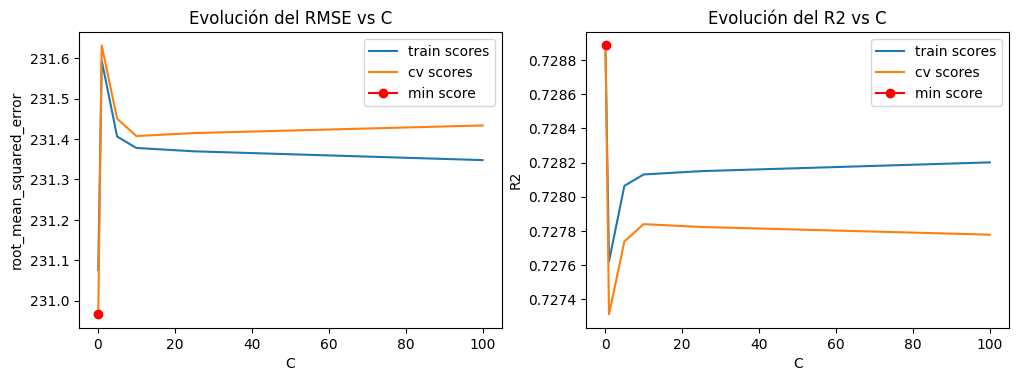

In [11]:
%%time
from sklearn.model_selection import cross_validate
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = [0.1, 1, 5, 10, 25, 100]
hiperparametro = 'C'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = SVR(
                C = elemento,
                kernel='linear',
                verbose = True
                # n_jobs       = -1,
                # random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=-1
                ,verbose = 2
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="min score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

In [8]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
#Se crea una instancia de una SVR Regression
SVMR = SVR()

#Se establecen los hiperparámetros para el Kernel lineal
svm_linear = {'C': [0.1, 1, 3, 5, 10, 100],
              'kernel': ['linear']}

#Se establecen los hiperparámetros para el Kernel polinomico
svm_poly = {'C': [0.1, 1, 3, 5, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale'],
              'degree': [2, 3],
              'kernel': ['poly']}

#Se establecen los hiperparámetros para los kernels rbf y sigmoid
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001,'auto', 'scale'],
              'kernel': [ 'rbf', 'sigmoid']}

#Se unen todos los hiperparametros en una lista de diccionarios
parameters = [svm_linear, svm_poly, svm_others]


# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(SVMR, param_grid=parameters, cv=5, verbose=3,n_jobs=16)

#Se entrena el GridSearchCV anterior
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 138 candidates, totalling 690 fits


KeyboardInterrupt: 

## GradientBoost con ciclo final en realidad

### Afinamiento de parámetros

#### Learning rate

In [13]:
X_train

,VOLTAGE_B,VOLTAGE_A,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,distancia,vel_prom,POWER_B,CURRENT_B_CALC,ENV_HUMIDITY,ENV_TEMPERATURE,CURRENT_A_CALC,POWER_A,bateria,RUL_registro
36149,14.79,30.22,84.008857,86.180000,85.636667,16.54,16.9,0.21,4.11,57.130000,23.730000,0.28,0.01,1,76
10609,18.52,37.95,60.770000,61.461667,60.539677,16.88,17.4,0.00,0.07,71.090000,21.943077,0.16,0.00,1,1067
26589,16.99,34.76,49.935294,50.633636,49.902000,0.00,0.0,0.69,13.39,68.440000,22.460000,3.52,0.10,1,1054
58657,18.46,37.87,27.410000,27.410000,27.410000,15.46,18.7,0.31,5.93,67.490000,22.926757,1.06,0.03,2,1264
68776,16.49,33.54,36.761081,36.426923,36.420000,15.18,17.8,0.80,15.53,61.680000,23.700000,3.45,0.10,2,694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41390,20.35,41.71,22.270000,22.670000,22.990000,13.65,15.0,0.00,0.06,62.870000,24.590000,0.09,0.00,1,1642
42487,17.60,36.07,61.525238,62.290000,63.014000,13.65,15.0,0.00,0.05,48.620000,27.670000,0.14,0.00,1,545
10489,16.61,34.08,54.772000,53.548000,54.456667,16.88,17.4,0.67,12.84,71.126667,22.338750,3.01,0.09,1,1187
68359,18.25,37.53,26.538000,26.098000,26.720000,15.18,17.8,0.45,8.64,61.750000,23.760000,1.34,0.04,2,1111


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    8.6s remaining:   12.9s
[Parallel(n_jobs=18)]: Done   3 out of   5 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    8.6s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    7.3s remaining:   11.0s
[Parallel(n_jobs=18)]: Done   3 out of   5 | elapsed:    7.3s remaining:    4.8s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    7.4s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.3s
[Parallel(n_jobs=18)]: Done   3 out of   5 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    8.2s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent wo

Mejor valor de learning_rate
0.55
CPU times: total: 57.2 s
Wall time: 5min 12s


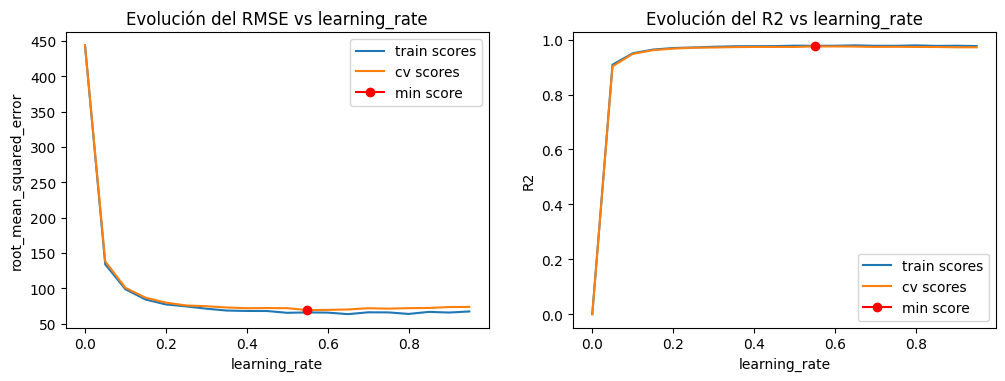

In [99]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange (0, 1, 0.05)
hiperparametro = 'learning_rate'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = GradientBoostingRegressor(
                learning_rate = elemento,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
                ,verbose=10
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="min score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### n_estimators

[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    6.9s remaining:   10.4s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    7.0s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.4s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   10.3s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   13.7s remaining:   20.5s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   13.8s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parall

Mejor valor de n_estimators
300
CPU times: total: 22.8 s
Wall time: 2min 39s


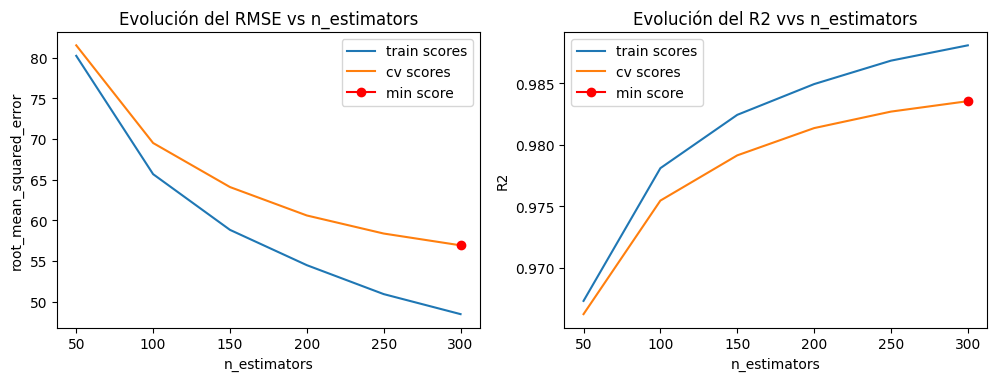

In [100]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(50,350,50)
hiperparametro = 'n_estimators'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in listado:

    modelo = GradientBoostingRegressor(
                n_estimators = n_estimators,
                learning_rate = 0.6,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
                ,verbose = 4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="min score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vvs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### max_depth

[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    9.3s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   14.0s remaining:   21.1s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   14.2s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   19.0s remaining:   28.6s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   19.1s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parall

Mejor valor de max_depth
5
CPU times: total: 53.1 s
Wall time: 4min 51s


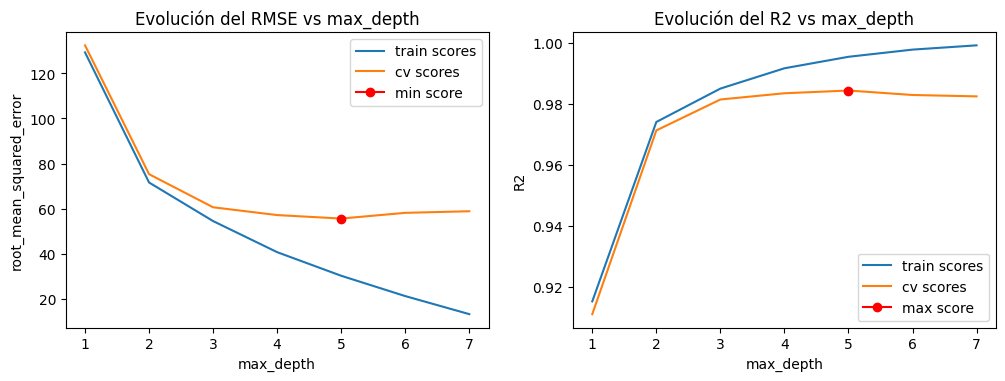

In [101]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(1,8,1)
hiperparametro = 'max_depth'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = GradientBoostingRegressor(
                n_estimators = 200,
                max_depth = elemento,
                learning_rate = 0.6,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
                ,verbose = 4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

### GridSearch

In [102]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
#Se crea una instancia de una GBR
GBR_GS = GradientBoostingRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.2,1,0.1)
        ,'n_estimators': range(20,250,50)
        ,'max_depth':range(1,8,1)
        }

scoring_list = ['neg_root_mean_squared_error', 'r2']


# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(GBR_GS, param_grid=params, cv=5, verbose=10,n_jobs=18,scoring=scoring_list, refit='neg_root_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
CPU times: total: 16.4 s
Wall time: 18min 23s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=18,
             param_grid={'learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(1, 8),
                         'n_estimators': range(20, 250, 50)},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'r2'], verbose=10)

In [103]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_root_mean_squared_error',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
34,43.314609,0.144124,0.035902,1.951223e-04,0.2,7,220,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",-41.626414,-44.459821,-43.936638,-43.011232,-41.972839,-43.001389,1.090897,1,-18.490871,-18.678656,-19.152567,-18.545306,-19.112196,-18.795919,0.281723,0.991228,0.989723,0.990257,0.990764,0.991021,0.990599,0.000545,1,0.998262,0.998238,0.998134,0.998246,0.998147,0.998205,0.000054
33,33.527303,0.063597,0.030103,2.030864e-04,0.2,7,170,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",-42.321810,-45.435350,-44.869457,-43.964605,-42.887311,-43.895707,1.167686,2,-22.075899,-22.602660,-22.767143,-21.994410,-22.583260,-22.404674,0.309478,0.990933,0.989267,0.989839,0.990350,0.990626,0.990203,0.000590,2,0.997523,0.997421,0.997364,0.997533,0.997412,0.997450,0.000066
69,43.012874,0.046920,0.033901,1.957527e-04,0.3,7,220,"{'learning_rate': 0.30000000000000004, 'max_de...",-44.196126,-46.911098,-45.757923,-45.299458,-45.335797,-45.500080,0.874641,3,-14.185759,-15.108892,-14.608631,-14.640572,-14.658991,-14.640569,0.292417,0.990112,0.988559,0.989432,0.989755,0.989525,0.989477,0.000515,3,0.998977,0.998847,0.998915,0.998907,0.998910,0.998911,0.000041
32,23.821279,0.070649,0.023303,1.250238e-03,0.2,7,120,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",-43.760730,-47.413448,-46.896642,-45.224099,-44.443119,-45.547608,1.401338,4,-26.381910,-27.732609,-28.388420,-26.682320,-27.061120,-27.249276,0.726695,0.990306,0.988312,0.988900,0.989789,0.989933,0.989448,0.000732,4,0.996463,0.996117,0.995901,0.996369,0.996284,0.996227,0.000199
29,36.915013,0.098138,0.031303,1.075517e-03,0.2,6,220,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",-43.356619,-47.028893,-46.433658,-46.243083,-44.932279,-45.598906,1.313688,5,-26.522706,-27.412267,-28.140815,-28.605313,-27.688341,-27.673889,0.704194,0.990484,0.988501,0.989118,0.989324,0.989711,0.989428,0.000657,5,0.996425,0.996206,0.995972,0.995827,0.996110,0.996108,0.000204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.554883,0.002940,0.003800,4.001152e-04,0.6,1,20,"{'learning_rate': 0.6000000000000001, 'max_dep...",-199.805459,-200.370614,-199.243967,-203.683743,-195.866349,-199.794026,2.497667,276,-198.746383,-197.718304,-198.666637,-196.651005,-199.079406,-198.172347,0.885125,0.797903,0.791266,0.799640,0.792874,0.804478,0.797232,0.004761,276,0.799247,0.802620,0.799258,0.802763,0.798906,0.800559,0.001746
105,0.552626,0.004258,0.003600,4.902716e-04,0.5,1,20,"{'learning_rate': 0.5000000000000001, 'max_dep...",-207.174755,-208.360267,-208.631946,-213.561832,-204.718716,-208.489503,2.888353,277,-207.369225,-205.988728,-208.024386,-206.313836,-208.011110,-207.141457,0.848703,0.782720,0.774288,0.780314,0.772297,0.786405,0.779205,0.005241,277,0.781449,0.785762,0.779901,0.782903,0.780457,0.782094,0.002098
70,0.558278,0.003923,0.003000,6.910027e-07,0.4,1,20,"{'learning_rate': 0.4000000000000001, 'max_dep...",-221.450862,-220.984320,-221.772460,-226.295088,-219.349683,-221.970483,

In [104]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_root_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_GBR_final_20231108.xlsx')

In [105]:
# Se identifican los mejores hiperparámetros
best_params = grid_result.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 220}


In [ ]:
X_balanced

In [24]:
from sklearn.model_selection import cross_validate
# Se crea un modelo SVR con los mejores hiperparámetros
best_gbr = GradientBoostingRegressor(random_state=0
                                     ,learning_rate=0.2
                                     ,max_depth=7
                                     ,n_estimators=220
                                     ,verbose=3
                                     )

# Se definen los Pliegues (Folks)
CV = 10


# Definición de metricas a evaluar el modelo
scoring = {
    'r2':'r2',
    'neg_mean_squared_error(MSE)': 'neg_mean_squared_error',
    'root_mean_squared_error(RMSE)': 'neg_root_mean_squared_error',
    'mean_absolute_error(MAE)': 'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error(MAPE)': 'neg_mean_absolute_percentage_error'
    }


#Se se ejecuta una validación cruzada utilizando las métricas definidas anteriormente
scores = cross_validate(best_gbr, X_Min_Max, y,cv=CV, scoring= scoring,n_jobs=-1)

NameError: name 'X_Min_Max' is not defined

In [97]:
pd.DataFrame(scores).mean()

fit_time                                           100.512755
score_time                                           0.016520
test_r2                                              0.773790
test_neg_mean_squared_error(MSE)                -44249.159332
test_root_mean_squared_error(RMSE)                -193.924141
test_mean_absolute_error(MAE)                     -142.790607
test_neg_mean_absolute_percentage_error(MAPE)       -0.591153
dtype: float64

## Adaboost final

In [115]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(random_state=0, n_estimators=100)
reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

### Afinamiento de parámetros

#### learning_rate

In [106]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================

train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange(0.1,1,0.1)
hiperparametro = 'learning_rate'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                # n_estimators = elemento,
                # max_depth = max_depth,
                learning_rate = elemento,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs = 18
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())



CPU times: total: 19.9 s
Wall time: 45.9 s


Mejor valor de learning_rate
0.9


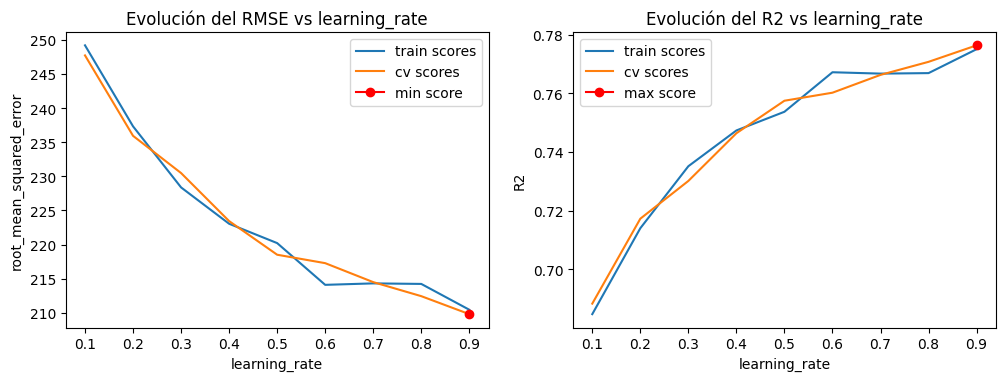

In [107]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### loss + learning rate

In [108]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange(0.1,1,0.1)
hiperparametro = 'learning_rate'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                # n_estimators = elemento,
                # max_depth = max_depth,
                learning_rate = elemento,
                random_state = 123
                ,loss='exponential'
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())



CPU times: total: 20.4 s
Wall time: 46.1 s


Mejor valor de learning_rate
0.9


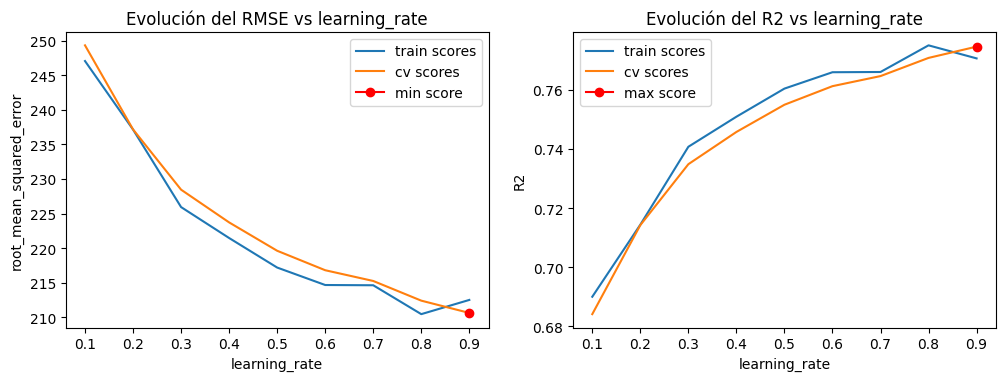

In [109]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### n_estimators

In [110]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(10,200,10)
hiperparametro = 'n_estimators'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                n_estimators = elemento
                ,learning_rate = 0.8
                ,loss = 'exponential'
                # learning_rate = 0.6,
                ,random_state = 123
             )


    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=16
                ,verbose=4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.1s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.7s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

CPU times: total: 1min 10s
Wall time: 2min 39s


[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    6.6s remaining:    9.9s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    6.6s finished


Mejor valor de n_estimators
80


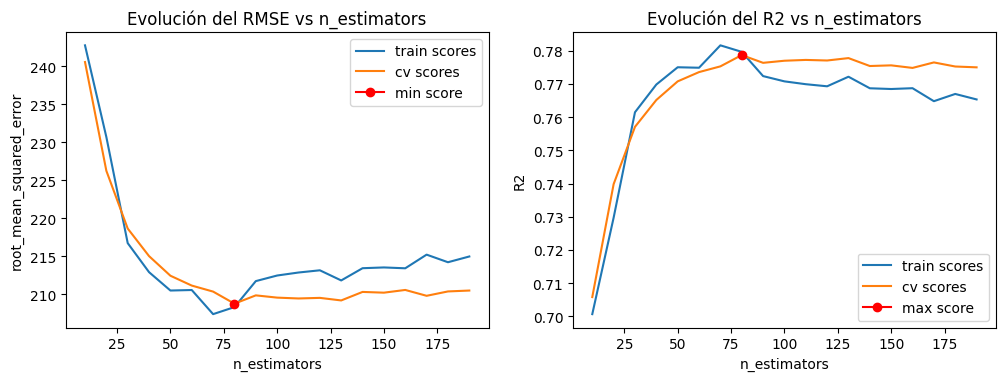

In [111]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

### Grid Search

In [112]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
#Se crea una instancia de una GBR
ABR_GS = AdaBoostRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.1,1,0.1)
        ,'n_estimators': range(50,200,10)
        ,'loss':['linear', 'square', 'exponential']
        }

# score
scoring_list = ['neg_root_mean_squared_error', 'r2']

# Se define un GridSearchCV con una validacion cruzada de 5 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(ABR_GS, param_grid=params, cv=5, verbose=2,n_jobs=18,scoring=scoring_list, refit='neg_root_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
CPU times: total: 6.97 s
Wall time: 13min 49s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=18,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': range(50, 200, 10)},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'r2'], verbose=2)

In [113]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_root_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_ABR_ciclo_20231108.xlsx')

In [115]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_root_mean_squared_error',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
385,6.603787,0.064565,0.099821,0.006720,0.9,square,150,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-199.872737,-194.947468,-193.531872,-195.876222,-192.693895,-195.384439,2.499946,1,-198.238006,-197.458563,-193.158842,-192.125721,-193.522783,-194.900783,2.462255,0.797767,0.802412,0.810963,0.808449,0.810761,0.806070,0.005176,1,0.800273,0.803138,0.810234,0.811736,0.809975,0.807071,0.004514
384,6.223427,0.038058,0.092316,0.005231,0.9,square,140,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-196.844836,-197.762660,-199.807905,-194.052669,-190.607341,-195.815082,3.194457,2,-196.060693,-200.195840,-199.408076,-191.458854,-191.646716,-195.754036,3.701198,0.803847,0.796664,0.798504,0.811999,0.814837,0.805170,0.007192,2,0.804636,0.797642,0.797756,0.813040,0.813641,0.805343,0.007007
383,5.924093,0.071426,0.088316,0.004793,0.9,square,130,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-195.058691,-192.024113,-197.662602,-198.245295,-196.941009,-195.986342,2.253171,3,-192.904718,-194.748561,-197.736608,-194.536348,-197.234016,-195.432050,1.800828,0.807391,0.808293,0.802808,0.803787,0.802327,0.804921,0.002448,3,0.810875,0.808505,0.801133,0.806982,0.802616,0.806022,0.003637
379,4.470725,0.027336,0.059413,0.003471,0.9,square,90,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-203.214372,-196.375758,-194.512391,-196.112604,-190.919574,-196.226940,3.999181,4,-201.703859,-197.830404,-194.800916,-192.818079,-191.791880,-195.789028,3.603680,0.790948,0.799506,0.809043,0.807986,0.814230,0.804343,0.008197,4,0.793228,0.802396,0.806994,0.810376,0.813359,0.805271,0.007039
340,6.807688,0.085045,0.100920,0.004500,0.8,square,150,"{'learning_rate': 0.8, 'loss': 'square', 'n_es...",-195.446887,-195.315808,-196.530102,-196.377585,-200.061844,-196.746445,1.726865,5,-193.442284,-198.825701,-196.564453,-192.442111,-200.548730,-196.364656,3.083172,0.806624,0.801665,0.805061,0.807467,0.796012,0.803366,0.004178,5,0.809819,0.800403,0.803483,0.811115,0.795926,0.804149,0.005706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,4.382723,0.034356,0.039707,0.002421,0.1,linear,60,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es...",-244.843529,-246.689754,-242.018051,-248.729480,-240.734577,-244.603078,2.935537,401,-244.490864,-243.680220,-243.913514,-241.163172,-242.031296,-243.055813,1.250330,0.696525,0.683606,0.704378,0.691130,0.704640,0.696056,0.008030,401,0.696199,0.700187,0.697406,0.703367,0.702771,0.699986,0.002837
31,4.313693,0.025868,0.039606,0.003512,0.1,exponential,60,"{'learning_rate': 0.1, 'loss': 'exponential', ...",-244.246725,-249.856694,-241.583997,-249.183894,-240.921835,-245.158629,3.737233,402,-244.380200,-247.111874,-244.195578,-240.848734,-243.063452,-243.919968,2.031853,0.698002,0.675431,0.705438,0.690000,0.704180,0.694610,0.011040,402,0.696474,0.691683,0.696705,0.704140,0.700231,0.697847,0.004159
15,3.542339,0.013871,0.032003,0.002366,0.1,square,50,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",-245.730

In [116]:
# Se identifican los mejores hiperparámetros
best_params = grid_result.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'learning_rate': 0.9, 'loss': 'square', 'n_estimators': 150}


In [109]:
from sklearn.model_selection import cross_validate
# Se crea un modelo SVR con los mejores hiperparámetros
best_abr = AdaBoostRegressor(random_state=0
                                     ,learning_rate=0.9
                                     ,n_estimators=180
                                     ,loss='square'

                                     )

# Se definen los Pliegues (Folks)
CV = 10


# Definición de metricas a evaluar el modelo
scoring = {
    'r2':'r2',
    'neg_mean_squared_error(MSE)': 'neg_mean_squared_error',
    'root_mean_squared_error(RMSE)': 'neg_root_mean_squared_error',
    'mean_absolute_error(MAE)': 'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error(MAPE)': 'neg_mean_absolute_percentage_error'
    }


#Se se ejecuta una validación cruzada utilizando las métricas definidas anteriormente
scores = cross_validate(best_abr, X, y,cv=CV, scoring= scoring,n_jobs=-1,return_train_score=True)

In [110]:
pd.DataFrame(scores).mean()

fit_time                                             21.048433
score_time                                            0.078481
test_r2                                               0.642254
train_r2                                              0.876071
test_neg_mean_squared_error(MSE)                 -69067.477089
train_neg_mean_squared_error(MSE)                -24030.384573
test_root_mean_squared_error(RMSE)                 -245.780703
train_root_mean_squared_error(RMSE)                -154.984292
test_mean_absolute_error(MAE)                      -193.475331
train_mean_absolute_error(MAE)                     -129.957755
test_neg_mean_absolute_percentage_error(MAPE)        -1.226564
train_neg_mean_absolute_percentage_error(MAPE)       -0.976864
dtype: float64

# Sin ciclo

In [111]:
X = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)][variables_sin_ciclo_inicial]#[['CURRENT_A_CALC','POWER_A','TEMPERATURE_A','VOLTAGE_A']]
y = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)]['RUL_registro']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Min_Max=X.copy(deep=True)
X_Min_Max[X.columns] = scaler.fit_transform(X)
# X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,#X_Min_Max,
                                        y.values.reshape(-1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True,
                                        stratify = X['bateria']
                                    )
X_train.drop('bateria',axis=1,inplace=True)
X_test.drop('bateria',axis=1,inplace=True)

# define model
#model = XGBRegressor()
# fit model
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)

#from sklearn.metrics import mean_squared_error

#print(np.sqrt(mean_squared_error(y_test, y_pred)))

#imp_features = model.feature_importances_
# for i in imp_features:
    # print(i.round(3))
#df_imp_features = pd.DataFrame({"features":variables_sin_ciclo}).join(pd.DataFrame({"weights":imp_features}))
#display(df_imp_features.sort_values(by=['weights'], ascending=False))

#xgboost.plot_tree(model, num_trees=2)
#fig = plt.gcf()
#fig.set_size_inches(150, 100)
#fig.savefig('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/pruebas_variables/tree_sin_ciclo.png')

## GradientBoost sin ciclo

### Grid search

In [11]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
#Se crea una instancia de una GBR
GBR_GS = GradientBoostingRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.2,1,0.1)
        ,'n_estimators': range(20,250,50)
        ,'max_depth':range(1,8,1)
        }

scoring_list = ['neg_mean_squared_error', 'r2']


# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(GBR_GS, param_grid=params, cv=5, verbose=2,n_jobs=18,scoring=scoring_list, refit='neg_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


KeyboardInterrupt: 

In [9]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_GBR_sin_ciclo_20231016.xlsx')

## AdaBoost sin ciclo

### Grid Search

In [11]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
#Se crea una instancia de una GBR
ABR_GS = AdaBoostRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.1,1,0.1)
        ,'n_estimators': range(50,200,10)
        ,'loss':['linear', 'square', 'exponential']
        }

# score
scoring_list = ['neg_mean_squared_error', 'r2']

# Se define un GridSearchCV con una validacion cruzada de 5 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(ABR_GS, param_grid=params, cv=5, verbose=3,n_jobs=18,scoring=scoring_list, refit='neg_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
CPU times: total: 5.64 s
Wall time: 32min 6s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=18,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': range(50, 200, 10)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=3)

In [14]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_ABR_sin_ciclo_20231016.xlsx')

In [13]:
# Se identifican los mejores hiperparámetros
best_params = grid_result.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'learning_rate': 0.9, 'loss': 'square', 'n_estimators': 130}


# otros

In [63]:
from sklearn.metrics import r2_score

In [64]:
from xgboost import DMatrix
data_dmatrix = DMatrix(data=X_test,label=y_test)
params = {'objective':'reg:squarederror'}
xgb_cv = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = "rmse",seed=123) 

c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

In [66]:
xgb_cv

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,322.500881,0.453506,323.465352,2.526318
1,239.535853,1.023042,241.427819,3.235072
2,179.019070,1.262128,181.856537,3.584283
3,137.015576,1.969439,140.165239,3.759941
4,106.441550,1.715295,110.234125,3.583622
5,84.428509,1.183395,88.480368,2.985455
6,68.685276,1.464931,73.339414,2.978057
7,56.964166,1.475815,61.955907,2.413828
8,48.600474,1.461620,53.751039,2.496664
9,42.553086,1.270834,48.106832,1.704345


In [17]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


<Figure size 2000x1200 with 0 Axes>

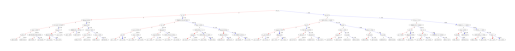

In [68]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plot_tree(model)
plt.show()

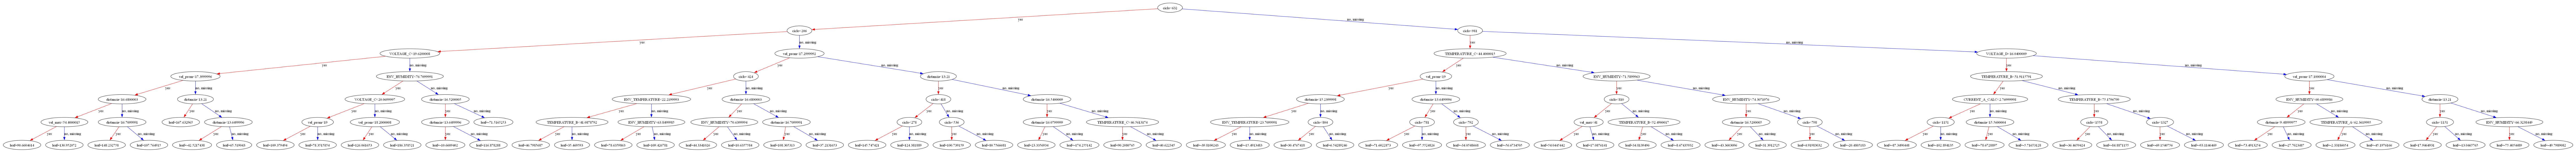

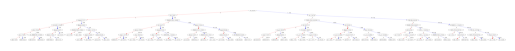

In [72]:
# plot single tree
plot_tree(model)
plt.show()

# Cross Validation

In [ ]:
#Creación y entrenamiento de los modelos 

modelSVR    = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelGBR    = LogisticRegression(random_state=0).fit(X_train, y_train)
modelABR    = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
modelRanForest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=0).fit(X_train, y_train)
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)

In [10]:
X_train

,VOLTAGE_B,VOLTAGE_A,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,distancia,vel_prom,POWER_B,CURRENT_B_CALC,ENV_HUMIDITY,ENV_TEMPERATURE,CURRENT_A_CALC,POWER_A
36149,14.79,30.22,84.008857,86.180000,85.636667,16.54,16.9,0.21,4.11,57.130000,23.730000,0.28,0.01
10609,18.52,37.95,60.770000,61.461667,60.539677,16.88,17.4,0.00,0.07,71.090000,21.943077,0.16,0.00
26589,16.99,34.76,49.935294,50.633636,49.902000,0.00,0.0,0.69,13.39,68.440000,22.460000,3.52,0.10
58657,18.46,37.87,27.410000,27.410000,27.410000,15.46,18.7,0.31,5.93,67.490000,22.926757,1.06,0.03
68776,16.49,33.54,36.761081,36.426923,36.420000,15.18,17.8,0.80,15.53,61.680000,23.700000,3.45,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41390,20.35,41.71,22.270000,22.670000,22.990000,13.65,15.0,0.00,0.06,62.870000,24.590000,0.09,0.00
42487,17.60,36.07,61.525238,62.290000,63.014000,13.65,15.0,0.00,0.05,48.620000,27.670000,0.14,0.00
10489,16.61,34.08,54.772000,53.548000,54.456667,16.88,17.4,0.67,12.84,71.126667,22.338750,3.01,0.09
68359,18.25,37.53,26.538000,26.098000,26.720000,15.18,17.8,0.45,8.64,61.750000,23.760000,1.34,0.04


In [11]:
X_test_1

,VOLTAGE_B,VOLTAGE_A,TEMPERATURE_A,TEMPERATURE_B,TEMPERATURE_C,distancia,vel_prom,POWER_B,CURRENT_B_CALC,ENV_HUMIDITY,ENV_TEMPERATURE,CURRENT_A_CALC,POWER_A
36149,14.79,30.22,84.008857,86.180000,85.636667,16.54,16.9,0.21,4.11,57.130000,23.730000,0.28,0.01
10609,18.52,37.95,60.770000,61.461667,60.539677,16.88,17.4,0.00,0.07,71.090000,21.943077,0.16,0.00
26589,16.99,34.76,49.935294,50.633636,49.902000,0.00,0.0,0.69,13.39,68.440000,22.460000,3.52,0.10
58657,18.46,37.87,27.410000,27.410000,27.410000,15.46,18.7,0.31,5.93,67.490000,22.926757,1.06,0.03
68776,16.49,33.54,36.761081,36.426923,36.420000,15.18,17.8,0.80,15.53,61.680000,23.700000,3.45,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41390,20.35,41.71,22.270000,22.670000,22.990000,13.65,15.0,0.00,0.06,62.870000,24.590000,0.09,0.00
42487,17.60,36.07,61.525238,62.290000,63.014000,13.65,15.0,0.00,0.05,48.620000,27.670000,0.14,0.00
10489,16.61,34.08,54.772000,53.548000,54.456667,16.88,17.4,0.67,12.84,71.126667,22.338750,3.01,0.09
68359,18.25,37.53,26.538000,26.098000,26.720000,15.18,17.8,0.45,8.64,61.750000,23.760000,1.34,0.04


In [13]:
y_train

array([  76, 1067, 1054, ..., 1187, 1111,  757], dtype=int64)

In [10]:
X_train_2 = pd.concat([X_train,X_test_1],axis=0)
y_train_2 = np.append(y_train,y_test_1)


In [8]:
modelSVR = SVR(C=10
               ,degree=2
               ,gamma=0.01
               ,kernel='poly'
              #  ,verbose=3
               )

modelGBR = GradientBoostingRegressor(random_state=0
                                   ,learning_rate=0.2
                                   ,max_depth=7
                                   ,n_estimators=220
                                  #  ,verbose=3
                                     )

modelABR = AdaBoostRegressor(random_state=0
                             ,learning_rate=0.9
                             ,n_estimators=180
                             ,loss='square'
                           #   ,verbose=3
                             )

In [9]:
# definicion de la variable con el número de pliegues
CV = 5

# Lista con las métricas de scoring
scoring = ['neg_root_mean_squared_error','neg_mean_squared_error', 'neg_median_absolute_error', 'neg_mean_absolute_percentage_error','r2']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelSVR', modelSVR),
    ('modelGBR', modelGBR),
    ('modelABR', modelABR),
    # ('modelComplNB', modelComplNB),
    # ('modelTreeClas', modelTreeClas),
    # ('modelRanForest', modelRanForest),
    # ('modelNN', ModelNN)
]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, 
                            X_train_2,
                            y_train_2,
                            cv=CV,
                            scoring=scoring,
                            return_train_score=True,
                            n_jobs=-1
                            ,verbose=3
                            )
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
# column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
# cv_df = cv_df.reindex(columns=column_order)

cv_df

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.4min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.7s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.6s finished


,fit_time,score_time,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_median_absolute_error,train_neg_median_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2,model_name
0,440.753426,3.417907,-178.495473,-179.274683,-31860.633998,-32139.411984,-82.101869,-82.919648,-0.542380,-0.607321,0.838569,0.836887,modelSVR
1,434.500361,2.993545,-183.028254,-178.072165,-33499.341782,-31709.695924,-82.840852,-82.573335,-0.708717,-0.565038,0.827582,0.839693,modelSVR
2,419.861618,2.730455,-180.370934,-178.470637,-32533.673891,-31851.768422,-83.072869,-82.866004,-0.559063,-0.591459,0.836913,0.837908,modelSVR
3,439.570882,3.169110,-178.233517,-179.285412,-31767.186516,-32143.258850,-84.223417,-82.071103,-0.572830,-0.593973,0.837952,0.837138,modelSVR
4,426.886382,2.975909,-176.186940,-179.974860,-31041.837873,-32390.950402,-82.131086,-82.861139,-0.590682,-0.601966,0.843469,0.835413,modelSVR
5,48.235243,0.046607,-38.901916,-20.036325,-1513.359059,-401.454329,-15.277545,-9.668888,-0.100217,-0.055214,0.992332,0.997963,modelGBR
6,48.440184,0.047082,-42.113752,-21.031163,-1773.568083,-442.309802,-15.459020,-10.106528,-0.123726,-0.055310,0.990872,0.997764,modelGBR
7,48.538677,0.031490,-40.824469,-20.312218,-1666.637247,-412.586199,-15.167985,-9.811564,-0.091047,-0.055064,0.991645,0.997900,modelGBR
8,48.386721,0.045758,-40.778333,-20.764928,-1662.872431,-431.182251,-15.978124,-9.940275,-0.092669,-0.058575,0.991517,0.997815,modelGBR
9,48.633858,0.046840,-39.044858,-20.234239,-1524.500957,-409.424411,-14.717112,-9.697386,-0.096041,-0.056230,0.992313,0.997920,modelGBR


In [49]:
cv_df.groupby("model_name")[scoring_list[0]].mean()

model_name
modelABR   -197.009741
modelGBR    -40.332665
modelSVR   -179.263024
Name: test_neg_root_mean_squared_error, dtype: float64

In [74]:
cv_df.groupby("model_name")[scoring_list].agg(['mean','std']).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/CrossValidation/cv_1_2023_11_09_RESUMEN.xlsx')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_21128\3818948256.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


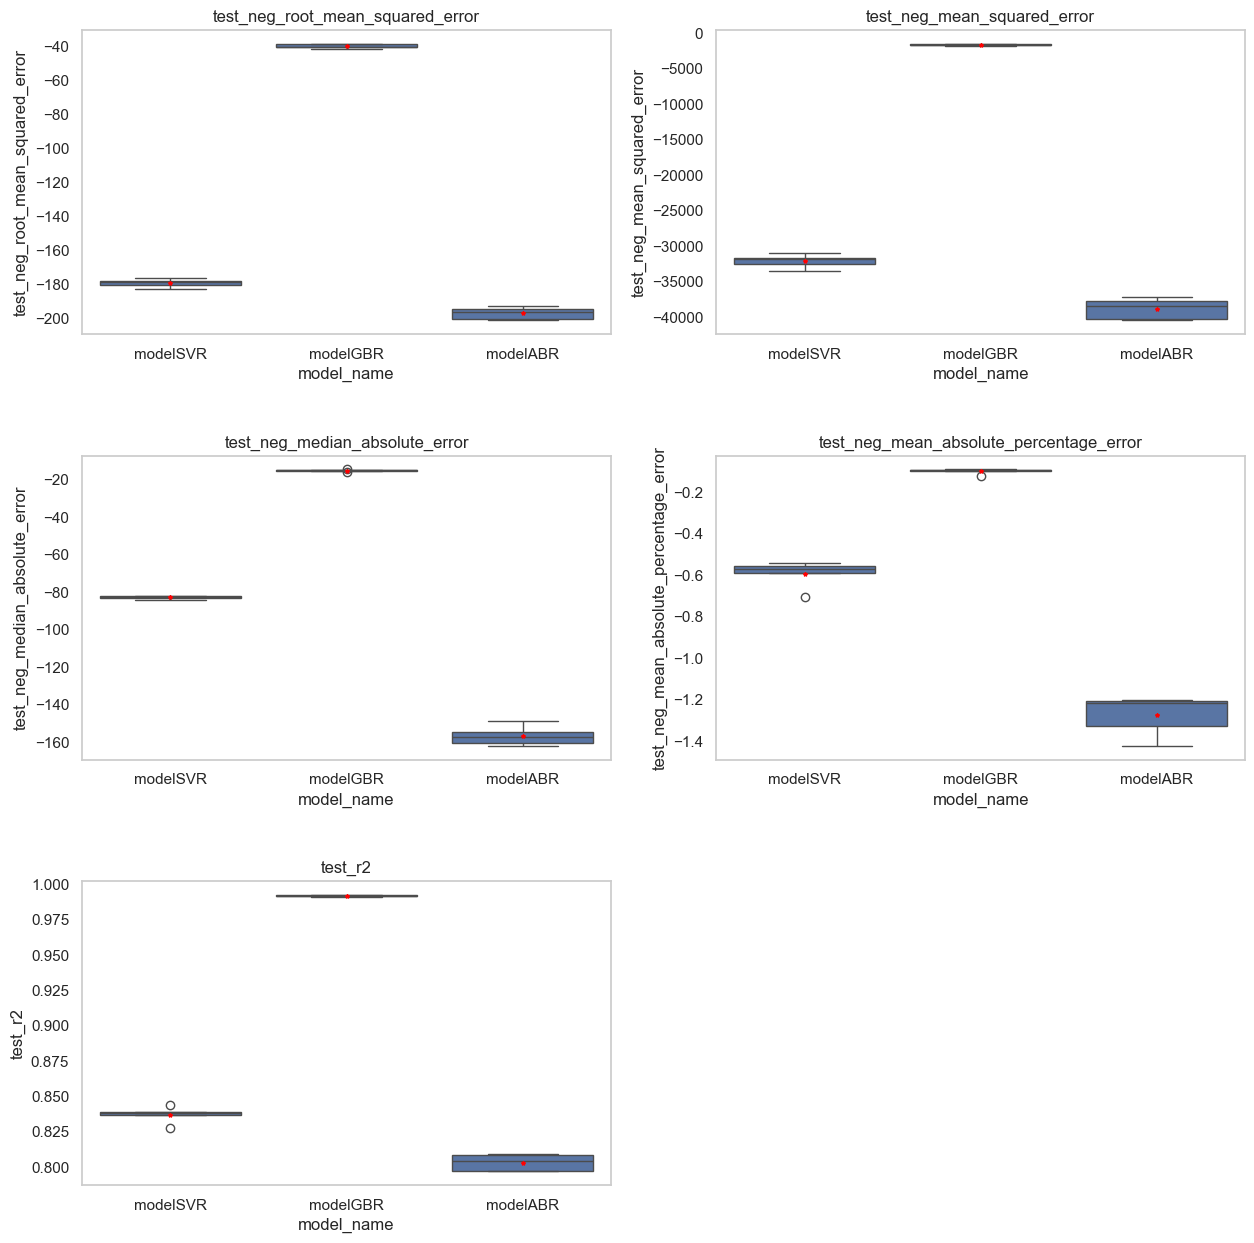

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
scoring_list = ["test_" + str(element) for element in scoring]

Grid_plot = plt.GridSpec(3, 2, wspace = 0.2,
                         hspace = 0.4)
contador = 0
# Create boxplots for the first row (3 plots)
for i in range(2):
    cv_df
    ax = plt.subplot(Grid_plot[0, i])
    sns.boxplot(x="model_name", y=scoring_list[contador], data=cv_df, ax=ax,showmeans=True,
                meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"red",
                      "markersize":"3"})
    ax.set_title(scoring_list[contador])
    ax.yaxis.grid(False)
    #mean_val = cv_df.groupby("model_name")[scoring_list[contador]].mean()
    #ax.hlines(mean_val, -0.5, 2.5, colors="red", linestyles="--", label="Mean")
    contador = contador+1

# Create boxplots for the second row (2 plots)
for i in range(2):
    ax = plt.subplot(Grid_plot[1, i])
    sns.boxplot(x="model_name", y=scoring_list[contador], data=cv_df, ax=ax,showmeans=True,
                meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"red",
                      "markersize":"3"})
    ax.set_title(scoring_list[contador])
    ax.yaxis.grid(False) 
    contador = contador+1

for i in range(1):
    ax = plt.subplot(Grid_plot[2, i])
    sns.boxplot(x="model_name", y=scoring_list[contador], data=cv_df, ax=ax,showmeans=True,
                meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"red",
                      "markersize":"3"})
    ax.set_title(scoring_list[contador])
    ax.yaxis.grid(False) 
    contador = contador+1

plt.tight_layout()

In [11]:
%%time
modelGBR.fit(X_train_2,y_train_2)


CPU times: total: 15.9 s
Wall time: 56.2 s


GradientBoostingRegressor(learning_rate=0.2, max_depth=7, n_estimators=220,
                          random_state=0)

In [12]:
%%time
predict = modelGBR.predict(X_test_2)

CPU times: total: 0 ns
Wall time: 22 ms


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

resultados = []
resultados.append(np.sqrt(mean_squared_error(y_test_2, predict,squared=False)))
resultados.append(mean_squared_error(y_test_2, predict,squared=False))
resultados.append(mean_absolute_error(y_test_2, predict))
resultados.append(mean_absolute_percentage_error(y_test_2, predict))
resultados.append(r2_score(y_test_2, predict))

medidas = ['RMSE','MSE','MAE','MAPE','R2']

df_final = pd.DataFrame()
df_final['Medidas'] = medidas
df_final['Resultados'] = resultados

In [16]:
df_final

,Medidas,Resultados
0,RMSE,6.148562
1,MSE,37.804815
2,MAE,23.574486
3,MAPE,0.098052
4,R2,0.992915


In [15]:
ruta_tablas = 'C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/Tablas/'

imp_features = modelGBR.feature_importances_
# for i in imp_features:
    # print(i.round(3))
df_imp_features = pd.DataFrame({"features":variables_ciclo}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False).to_excel(ruta_tablas+'gbr_pesos_FINAL.xlsx',index=False)
df_imp_features.sort_values(by=['weights'], ascending=False)

,features,weights
1,vel_max,0.286225
0,distancia,0.267567
2,vel_prom,0.111291
5,ACCELERATION_Z,0.102175
6,CURRENT_A_CALC,0.058928
3,ACCELERATION_X,0.055531
7,CURRENT_B_CALC,0.034090
9,CURRENT_D_CALC,0.019628
8,CURRENT_C_CALC,0.018161
4,ACCELERATION_Y,0.017718


In [79]:
df_final.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/CrossValidation/FINAL_20231109.xlsx',index=False)

In [63]:
print(np.sqrt(mean_squared_error(y_test_2, predict,squared=False)))

6.148562046159883


In [64]:
print(r2_score(y_test_2, predict)*100)

99.29153263102006


GradientBoostingRegressor(learning_rate=0.2, max_depth=7, n_estimators=220,
                          random_state=0)

In [11]:
cv_df.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/CrossValidation/cv_1_2023_11_09.xlsx',index=False)